# Algoritmo k-Nearest Neighbors (kNN) e Métricas de Avaliação de Classificação Binária

## 1. Importando as Bibliotecas Necessárias

### Explicação:
Antes de começar, é necessário importar as bibliotecas que serão utilizadas ao longo do notebook. Essas bibliotecas incluem ferramentas para manipulação de dados, criação de conjuntos de dados sintéticos, divisão dos dados em treino e teste, padronização, treinamento do modelo kNN, e avaliação do desempenho do modelo.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report


2. Criação do Conjunto de Dados Sintético

Neste passo, criamos um conjunto de dados sintético com características que simulam um problema de classificação binária. O conjunto de dados terá 12 features (variáveis preditoras), das quais 2 são informativas para a classificação e 10 são redundantes. Além disso, vamos alterar as escalas das primeiras duas features para garantir que suas magnitudes sejam desiguais, o que pode afetar o desempenho de alguns algoritmos, como o kNN, se os dados não forem padronizados.

In [14]:
# 2.1 Gerando os Dados
X, y = make_classification(n_samples=1000, n_features=12, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.5, 0.5], class_sep=1.0, random_state=42)

# 2.2 Criando Escalas Desiguais
X[:, 0] *= 1000  # Aumentando a escala da feature 0
X[:, 1] *= 0.1   # Diminuindo a escala da feature 1

# 2.3 Visualizando os Dados Antes da Padronização
df_before = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(12)])
df_before['target'] = y
print("Dados antes da padronização:")
print(df_before.head())


Dados antes da padronização:
     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -840.819403  -0.106847   0.429413  -0.174333  -0.290630   1.396501   
1  -323.275408  -0.123418  -0.695002  -0.567471  -0.614494   0.661023   
2  -546.534177  -0.132134  -0.375673  -0.494303  -0.571655   1.002206   
3 -1224.755872   0.027822   2.541892   0.861104   0.696853   1.757662   
4 -1268.781673  -0.006633   2.262898   0.676563   0.505412   1.874283   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  target  
0  -1.467258   1.189452   0.489416   0.956798   -0.331157    1.112826       1  
1  -1.324085   1.440466   0.833426   0.069887   -1.170891    0.079315       1  
2  -1.532274   1.521615   0.809353   0.395069   -1.009718    0.457996       1  
3  -0.443970  -0.457982  -0.724808   2.057623    1.842812    2.397554       1  
4  -0.787174  -0.051093  -0.473010   2.003275    1.459686    2.333653       1  


3. Padronização dos Dados

A padronização dos dados é uma etapa crucial antes de aplicar o kNN, pois este algoritmo baseia-se na distância entre os pontos de dados para fazer a classificação. Se as variáveis têm escalas diferentes, isso pode distorcer o cálculo das distâncias, fazendo com que as variáveis com maiores magnitudes dominem o processo de classificação. A padronização coloca todas as variáveis na mesma escala, geralmente com média 0 e desvio padrão 1.



In [15]:
# 3.1 Aplicando a Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.2 Visualizando os Dados Depois da Padronização
df_after = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(12)])
df_after['target'] = y
print("\nDados depois da padronização:")
print(df_after.head())



Dados depois da padronização:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.440784  -0.983289  -0.464606  -0.807547  -0.882836   0.559427   
1   0.370517  -1.141335  -1.397322  -1.486290  -1.445089  -0.164251   
2   0.020537  -1.224467  -1.132435  -1.359968  -1.370716   0.171458   
3  -1.042642   0.301120   1.287720   0.980115   0.831508   0.914795   
4  -1.111657  -0.027498   1.056291   0.661508   0.499153   1.029545   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  target  
0  -0.947628   0.981531   0.927943   0.082856   -0.796122    0.081226       1  
1  -0.825667   1.186480   1.389518  -0.881836   -1.489224   -0.883842       1  
2  -1.003012   1.252736   1.357219  -0.528135   -1.356195   -0.530238       1  
3  -0.075946  -0.363571  -0.701243   1.280221    0.998235    1.280873       1  
4  -0.368302  -0.031353  -0.363392   1.221107    0.682010    1.221204       1  


4. Salvando os Dados Antes e Depois da Padronização

Salvamos os conjuntos de dados antes e depois da padronização para que possamos compará-los posteriormente. Isso nos permitirá observar como a padronização afeta os dados e o desempenho do modelo.

In [16]:
# Salvando os Dados
df_before.to_csv('dados_antes_padronizacao.csv', index=False)
df_after.to_csv('dados_depois_padronizacao.csv', index=False)


5. Divisão dos Dados em Treino e Teste

Dividimos o conjunto de dados em dois subconjuntos: treino e teste. O conjunto de treino será usado para ajustar (treinar) o modelo kNN, enquanto o conjunto de teste será utilizado para avaliar o desempenho do modelo em dados não vistos.

In [17]:
# 5.1 Dividindo os Dados Antes da Padronização
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X, y, test_size=0.3, random_state=42)

# 5.2 Dividindo os Dados Depois da Padronização
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


6. Treinamento do Algoritmo kNN

Agora, treinamos o modelo kNN usando os dados de treino. Isso será feito tanto com os dados padronizados quanto com os dados não padronizados, para que possamos comparar o impacto da padronização no desempenho do modelo.

In [18]:
# 6.1 Treinando no Conjunto de Dados Não Padronizados
knn_before = KNeighborsClassifier(n_neighbors=5)
knn_before.fit(X_train_before, y_train_before)

# 6.2 Treinando no Conjunto de Dados Padronizados
knn_after = KNeighborsClassifier(n_neighbors=5)
knn_after.fit(X_train_after, y_train_after)


KNeighborsClassifier()

7. Testando o Algoritmo

Após o treinamento, usamos o modelo para fazer previsões no conjunto de dados de teste. Novamente, faremos isso tanto para os dados padronizados quanto para os não padronizados.

In [19]:
# 7.1 Testando no Conjunto de Dados Não Padronizados
y_pred_before = knn_before.predict(X_test_before)

# 7.2 Testando no Conjunto de Dados Padronizados
y_pred_after = knn_after.predict(X_test_after)


8. Métricas de Avaliação

Aqui, aplicamos diversas métricas de avaliação para comparar o desempenho do modelo em dados padronizados e não padronizados. As métricas incluem a matriz de confusão, a curva ROC, e o cálculo da AUC (Area Under the Curve).


Matriz de Confusão - Dados não padronizados:


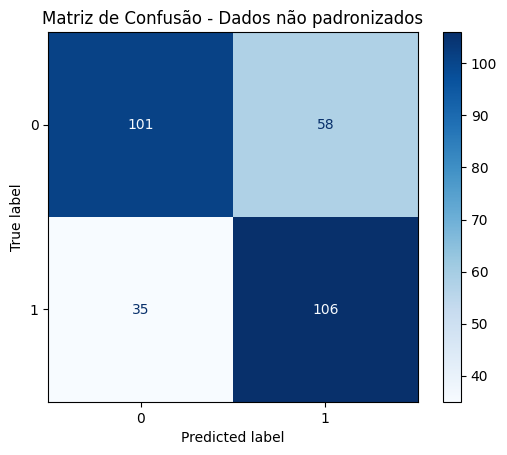


Matriz de Confusão - Dados padronizados:


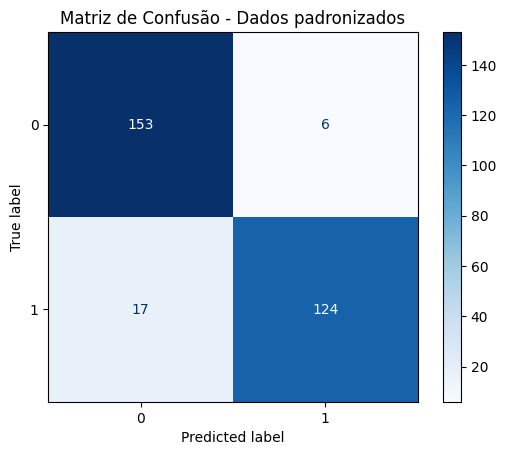

In [20]:
# 8.1 Matriz de Confusão

# Importando a biblioteca necessária
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de Confusão para os Dados Não Padronizados
print("\nMatriz de Confusão - Dados não padronizados:")
confusion_matrix_before = confusion_matrix(y_test_before, y_pred_before)
disp_before = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_before)
disp_before.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Dados não padronizados")
plt.show()

# Matriz de Confusão para os Dados Padronizados
print("\nMatriz de Confusão - Dados padronizados:")
confusion_matrix_after = confusion_matrix(y_test_after, y_pred_after)
disp_after = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_after)
disp_after.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Dados padronizados")
plt.show()



# Conclusão:
Neste notebook, mostramos como a padronização afeta a performance do algoritmo kNN. Observamos que, sem a padronização,
a discrepância nas escalas das variáveis preditoras impacta negativamente a acurácia do modelo.
A padronização é uma etapa essencial para garantir que todos os atributos influenciem igualmente o modelo,
especialmente em algoritmos baseados em distância, como o kNN.
